Image Data Shape (150, 4)
Label Data Shape (150,)
0.9111111111111111


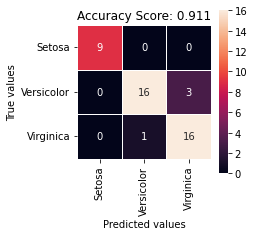

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
print("Image Data Shape", iris.data.shape)
print("Label Data Shape", iris.target.shape)

xTrain, xTest, yTrain, yTest = train_test_split(iris.data, iris.target, test_size=0.3)
model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(xTrain, yTrain)
predictions = model.predict(xTest)

score = model.score(xTest, yTest)
print(score)

cm = metrics.confusion_matrix(yTest, predictions)
x_axis_labels = ('Setosa', 'Versicolor', 'Virginica')
y_axis_labels = ('Setosa', 'Versicolor', 'Virginica')
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot = True, fmt = "d", linewidths=.5, square=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted values")
plt.ylabel("True values")
all_sample_title = 'Accuracy Score: %.3f' % score
plt.title(all_sample_title, size = 12)
plt.show()

Above we can see the confusion matrix, the accuracy score varies from run to run since we do not have a seed set. However it approximates to 0.94 score.

K:  3 Value:  1.0
K:  3 Value:  1.0


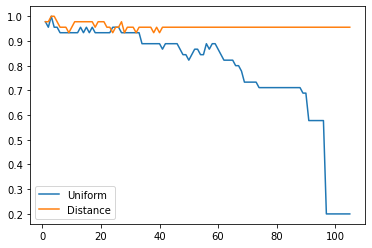

In [190]:
def classOfNeighbour(N, weight):
    knn = KNeighborsClassifier(n_neighbors=N, weights=weight)
    knn.fit(xTrain, yTrain)
    predictions = knn.predict(xTest)
    score = metrics.accuracy_score(yTest, predictions)
    return score

numberOfMeasurments = 105
magnitude = 1
classificationByNUniform = np.zeros(numberOfMeasurments, dtype = float)
classificationByNDistance = np.zeros(numberOfMeasurments, dtype = float)
indexByK = np.zeros(numberOfMeasurments, dtype=int)
for i in range(numberOfMeasurments):
    iNUni = classOfNeighbour(i*magnitude+1, "uniform")
    iNDist = classOfNeighbour(i*magnitude+1, "distance")
    classificationByNUniform[i] = iNUni
    classificationByNDistance[i] = iNDist
    indexByK[i] = i*magnitude+1

dfClassification = pd.DataFrame({"K": indexByK, "Uniform": classificationByNUniform, "Distance": classificationByNDistance})
#print(dfClassification.to_string(index=False))
print("K: ", magnitude * np.argmax(dfClassification.Uniform)+1, "Value: ", max(dfClassification.Uniform))
print("K: ", magnitude * np.argmax(dfClassification.Distance)+1, "Value: ", max(dfClassification.Distance))
plt.plot(indexByK, classificationByNUniform)
plt.plot(indexByK, classificationByNDistance)
plt.legend(['Uniform', 'Distance'], loc = "lower left")
plt.show()


We can see that the classification model K-Nearest-Neighbors performs well in both its weight methods when the number of neighbors is not very many. However with more neighbors considered we notice that the two weight methods vary alot between one another, where the distance based weight is clearly prefered as the number of neighbors does not effect the result by alot. This is because when analysing data points far from the source point, the weight is less thus contributes less to the result, whilst the clostest neighbors contributes a lot (in most cases). However for the uniform weight, every neighbor contributes equally to the result which implies that considering more neighbors results in bad accuracy.